In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from IPython.display import display
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Wczytaj dane
dt = pd.read_csv('AAL_data.csv', usecols=['open', 'high', 'low', 'close', 'volume'])

# Wybierz ilość próbek do przewidywania
K = 24
Procent = K/len(dt)*100
print("Procent przewidywanych próbek: %.2f" % (Procent)) 

# Dodaj kolumnę z przewidywaniami (wartości przesunięte o K wierszy w dół)
dt['prediction'] = dt['open'].shift(-K)

# Przygotuj dane wejściowe
X = np.array(dt.drop(['prediction'], 1))
X = StandardScaler().fit_transform(X)
X_dni = X[-K:]
X = X[:-K]

# Przygotuj dane wyjściowe
y = np.array(dt['prediction'])
y = y[:-K]

# Podziel dane na zbiór trenujący i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Utwórz model MLP i przeprowadź proces uczenia z użyciem Grid Search
mlp = MLPRegressor(random_state=1, max_iter=500)
parametry = {
    'learning_rate_init': [0.1, 0.01, 0.001], 
    'hidden_layer_sizes': [20, 40, 60, 80, 100], 
    'solver': ['adam', 'lbfgs', 'sgd'], 
    'learning_rate': ['constant', 'adaptive']
}
clf = GridSearchCV(mlp, parametry)
clf.fit(X_train, y_train)
print("Best params: ", clf.best_params_)

# Przygotuj model MLP z optymalnymi parametrami i przeprowadź uczenie
mlp = MLPRegressor(
    random_state=1, 
    max_iter=500, 
    hidden_layer_sizes=clf.best_params_['hidden_layer_sizes'], 
    learning_rate=clf.best_params_['learning_rate'],
    learning_rate_init=clf.best_params_['learning_rate_init'],
    solver=clf.best_params_['solver'], 
    activation='relu'
)
mlp.fit(X_train, y_train)

# Oceń dokładność modelu
print("Dokladność (train): ", mlp.score(X_train, y_train)*100, '%')
print("Dokladność (test): ", mlp.score(X_test, y_test)*100, '%')

# Dokonaj predykcji na kolejnych K wierszach
prediction_dni = mlp.predict(X_dni)
print("Predykcje dla kolejnych K wierszy: ", prediction_dni)


In [ ]:
# Wyświetl wykres z porównaniem rzeczywistych wartości z wartościami przewidywanymi
plt.plot(prediction_dni)
plt.plot(np.array(dt['open'])[-K:])
plt.show()


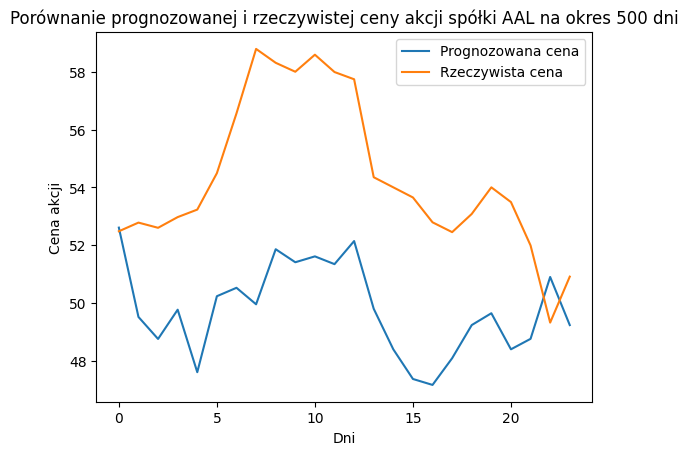

In [3]:
# rysowanie wykresu prognozowanej ceny akcji
plt.plot(prediction_dni, label='Prognozowana cena')

# rysowanie wykresu rzeczywistej ceny akcji
plt.plot(np.array(dt['open'])[-K:], label='Rzeczywista cena')

# dodanie opisu osi x
plt.xlabel('Dni')

# dodanie opisu osi y
plt.ylabel('Cena akcji')

# dodanie tytułu wykresu
plt.title('Porównanie prognozowanej i rzeczywistej ceny akcji spółki AAL na okres 500 dni')

# dodanie legendy
plt.legend()

# wyświetlenie wykresu
plt.show()